# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns',100)

import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

# Ingest Data  

In [2]:
data = pd.read_excel("World military power.xlsx")

# EDA

## Implement basic steps to see how is your data looks like

In [3]:
data.head(10)

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [4]:
data.shape

(139, 60)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

## Convert multi index columns to one level

In [6]:
df = data.set_axis(data.iloc[0], axis=1)

In [7]:
df.drop([0], inplace=True)

In [8]:
df.reset_index(inplace=True)

In [9]:
df.drop(columns="index", inplace=True)

In [10]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49,Argentina,0,Argentina,2,Argentina,4,Argentina,0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


## Detect and drop duplicated columns

In [11]:
df.duplicated().value_counts()

False    138
dtype: int64

In [12]:
drop_list = list(df.columns[2::2])

In [13]:
df = df.drop(columns=drop_list)

In [14]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968


## Check for missing values 

In [15]:
df.isnull().sum()

0
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value            

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [16]:
df[df["Aircraft Carrier Fleet Strength value"].isnull() == True]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524
11,Belarus,0.8179,202,39,68,4,28,63,21,532,1560,482,228,238,0,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599
13,Bhutan,10.1681,2,0,0,0,0,2,0,0,27,0,0,0,0,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136
16,Botswana,2.0582,45,10,0,11,8,16,0,55,245,0,30,20,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347
19,Burkina Faso,1.9009,16,0,3,1,4,8,2,0,350,0,0,0,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611
23,Central African Republic,3.2889,3,0,0,2,0,1,0,4,55,0,20,0,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920
24,Chad,1.6383,35,0,6,6,4,17,3,60,372,10,51,10,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406
30,Czechia,0.5531,95,12,16,8,15,44,15,116,682,86,85,0,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046
38,Ethiopia,0.8581,86,24,0,9,20,33,8,400,114,67,650,183,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57,0,55000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925


In [17]:
df["Aircraft Carrier Fleet Strength value"].value_counts()

0     102
2       6
1       4
4       2
20      1
Name: Aircraft Carrier Fleet Strength value, dtype: int64

In [18]:
df["Navy Fleet Strengths value"].fillna(0, inplace=True)

In [19]:
df.loc[df["Military Strength"] == "South Korea","Aircraft Carrier Fleet Strength value"] = df.loc[df["Military Strength"] == "South Korea","Aircraft Carrier Fleet Strength value"].fillna(2)

In [20]:
df["Aircraft Carrier Fleet Strength value"].fillna(0, inplace=True)

In [21]:
df[df["Frigate Fleet Strength value"].isnull() == True]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,0,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,0,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524
11,Belarus,0.8179,202,39,68,4,28,63,21,532,1560,482,228,238,0,0,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599
13,Bhutan,10.1681,2,0,0,0,0,2,0,0,27,0,0,0,0,0,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136
16,Botswana,2.0582,45,10,0,11,8,16,0,55,245,0,30,20,0,0,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347
19,Burkina Faso,1.9009,16,0,3,1,4,8,2,0,350,0,0,0,0,0,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611
23,Central African Republic,3.2889,3,0,0,2,0,1,0,4,55,0,20,0,0,0,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920
24,Chad,1.6383,35,0,6,6,4,17,3,60,372,10,51,10,0,0,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406
30,Czechia,0.5531,95,12,16,8,15,44,15,116,682,86,85,0,0,0,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046
38,Ethiopia,0.8581,86,24,0,9,20,33,8,400,114,67,650,183,0,0,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57,0,55000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925


In [22]:
# guney kore 22 denizaltı

df.loc[df["Military Strength"] == "South Korea","Submarine Fleet Strength value"] = df.loc[df["Military Strength"] == "South Korea","Submarine Fleet Strength value"].fillna(22)

In [23]:
df["Submarine Fleet Strength value"].fillna(0, inplace=True)

In [24]:
df.loc[df["Military Strength"] == "South Korea","Destroyer Fleet Strength value"] = df.loc[df["Military Strength"] == "South Korea","Destroyer Fleet Strength value"].fillna(12)

In [25]:
df["Destroyer Fleet Strength value"].fillna(0, inplace=True)

In [26]:
df.loc[df["Military Strength"] == "South Korea","Frigate Fleet Strength value"] = df.loc[df["Military Strength"] == "South Korea","Frigate Fleet Strength value"].fillna(18)

In [27]:
df["Frigate Fleet Strength value"].fillna(0, inplace=True)

In [28]:
# güney kore 2413
df.loc[df["Military Strength"] == "South Korea","Total Coastline Coverage value"] = df.loc[df["Military Strength"] == "South Korea","Total Coastline Coverage value"].fillna(2413)

In [29]:
df["Total Coastline Coverage value"].fillna(0,inplace=True)

In [30]:
df[df["Total Border Coverage value"].isnull() == True]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
9,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN
57,Japan,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155,4,20,40,0,"49,00,00,00,000","32,40,00,00,00,000",175,3841,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751,1770,NaN
69,Madagascar,3.0869,6,0,0,0,0,6,0,12,103,0,25,0,8,0,0,0,0,"11,50,00,000","4,08,90,00,000",83,0,18500,0,"1,01,45,026","2,56,83,610","5,87,040",4828,600,NaN
83,New Zealand,1.3684,48,0,0,7,13,22,0,0,200,0,24,0,11,0,0,0,2,"4,30,00,00,000","91,62,00,00,000",123,31480,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134,0,NaN
95,Philippines,0.7852,171,0,19,23,24,97,0,7,513,0,286,0,103,0,0,0,2,"3,47,00,00,000","76,18,00,00,000",247,15000,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289,3219,NaN
105,Singapore,0.7966,235,100,0,9,36,77,17,180,3000,48,77,24,40,0,0,0,6,"11,20,00,00,000","5,66,10,00,00,000",9,0,"13,40,000",0,"40,17,314","59,95,991",697,193,10,NaN
113,Sri Lanka,1.4661,77,0,0,15,6,54,9,202,570,0,209,22,40,0,0,0,0,"2,50,00,00,000","51,72,00,00,000",19,0,90000,0,"1,09,27,071","2,25,76,592",65610,1340,160,NaN
119,Taiwan,0.4008,744,289,0,19,207,210,91,1180,2000,482,1160,115,117,0,4,4,22,"10,72,50,00,000","1,81,90,00,00,000",37,196,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980,1566,3720,NaN


In [31]:
df["Total Border Coverage value"].fillna(0,inplace=True)

In [32]:
df.rename({"Military Strength":"Country"}, axis=1,inplace=True)

In [33]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968


In [34]:
df.isnull().sum()

0
Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Prod

## Fix the dtypes

In [35]:
df = df.apply(lambda x: x.astype(str), axis=1)

In [36]:
df = df.apply(lambda x: x.str.replace(",",""),axis=1)

In [37]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0,1200,5987
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362,41,691
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country                                  138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [39]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0,1200,5987
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362,41,691
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968


In [40]:
df = df.astype(float, errors="ignore")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [42]:
drop_list = ["Total Square Land Area value","Total Coastline Coverage value",
           "Total Waterway Coverage value","Total Border Coverage value" ]

In [43]:
df.drop(columns=drop_list, inplace=True)

In [44]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0


## Visualy inspect the some features

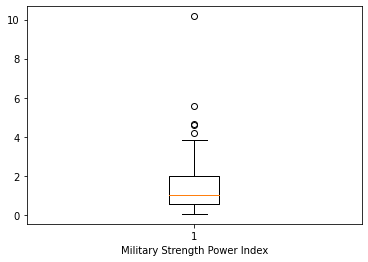

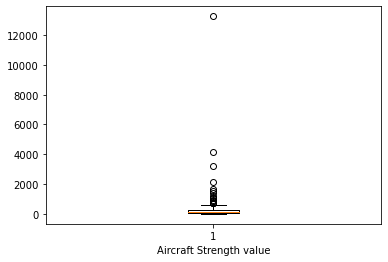

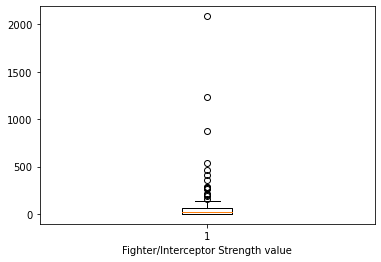

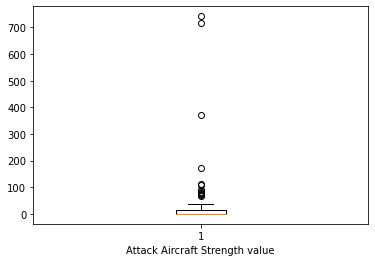

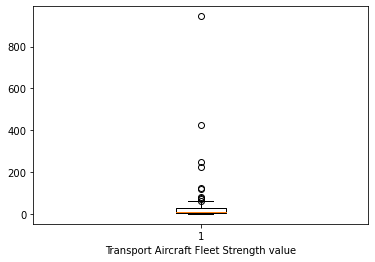

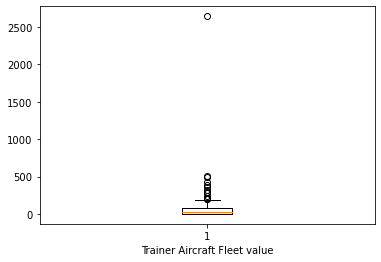

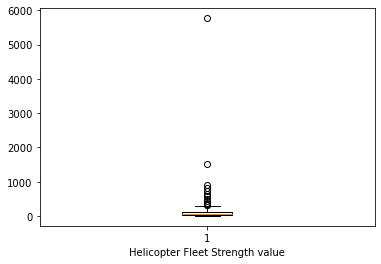

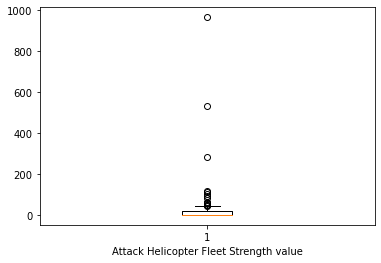

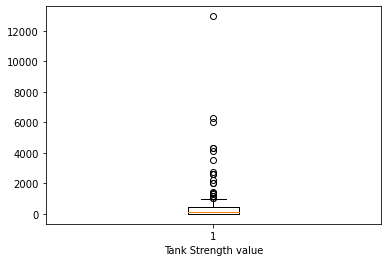

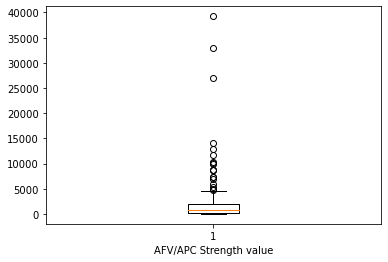

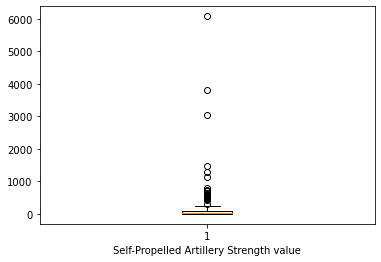

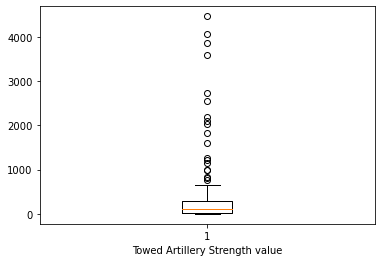

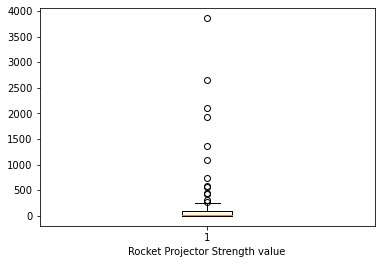

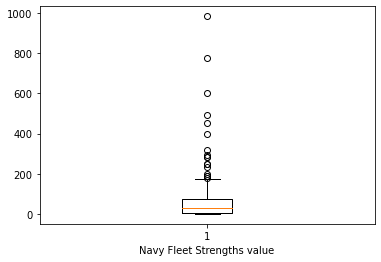

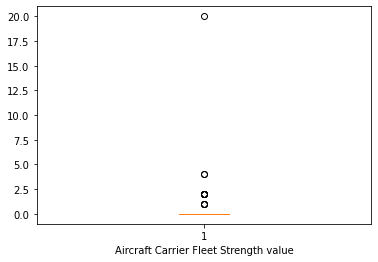

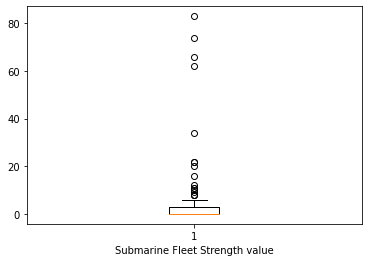

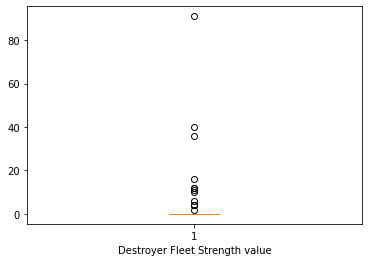

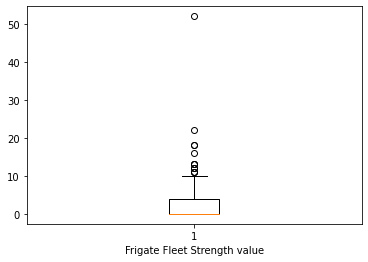

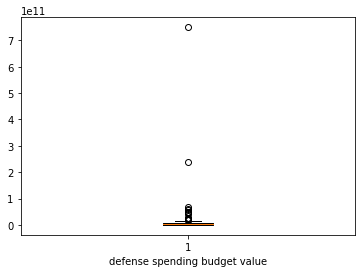

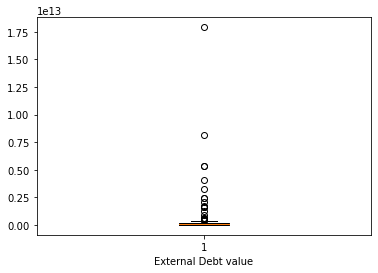

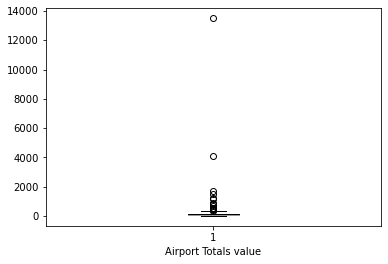

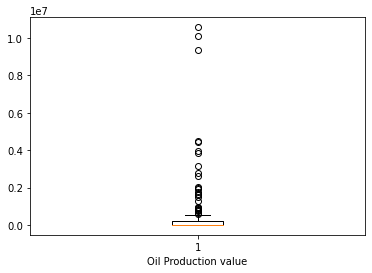

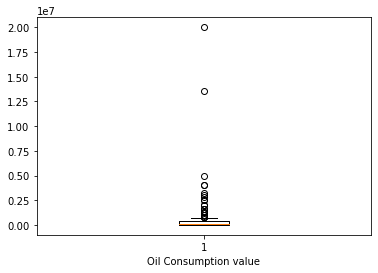

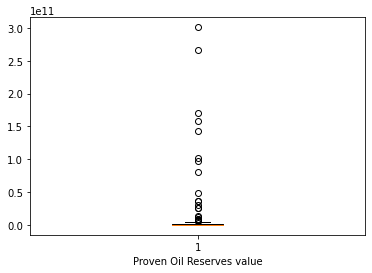

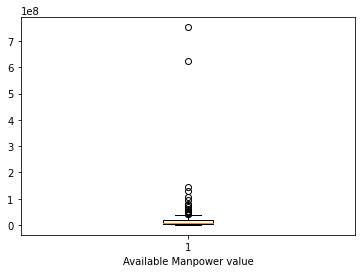

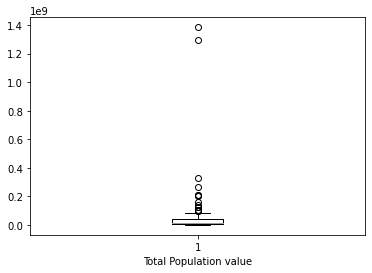

In [45]:
for i in list(df.columns):
    if i != "Country":
        plt.boxplot(x=i, data=df, )
        plt.xlabel(i)
        plt.show();

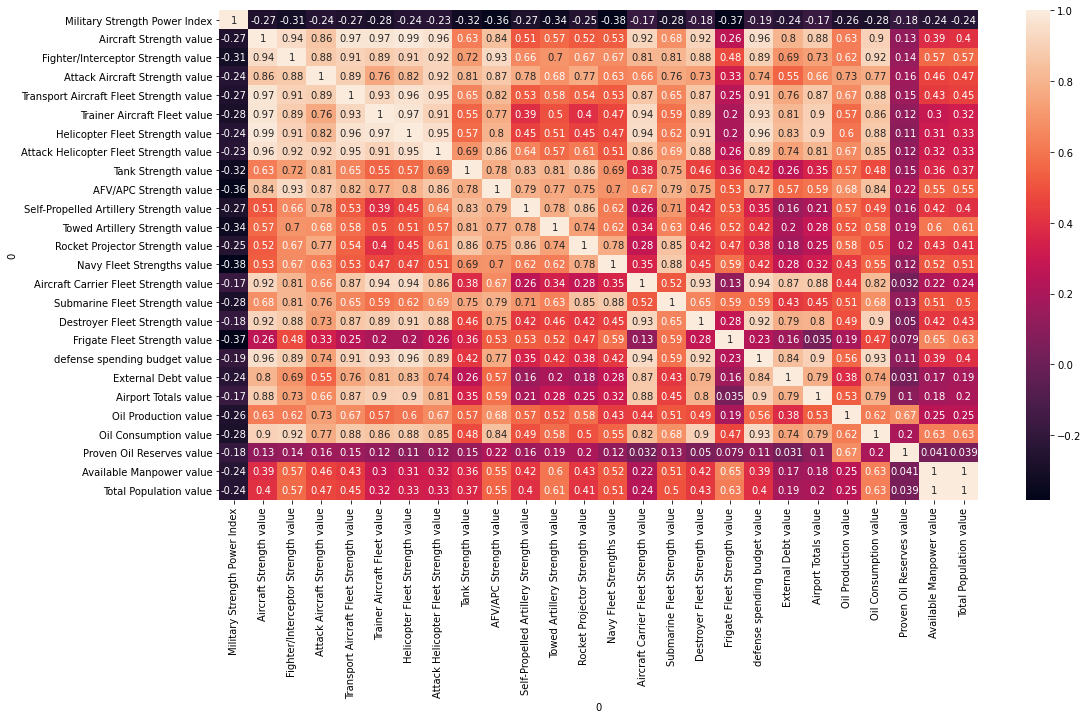

In [46]:
plt.figure(figsize = (17,9))
sns.heatmap(df.corr(),annot=True);

## Decriptive statistics

In [47]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.333333,4.159420,1.797101,3.065217,1.399363e+10,5.194983e+11,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.809679,12.719458,9.195492,6.185935,6.731189e+10,1.847252e+12,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+07,5.394000e+08,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,3.255000e+08,9.361500e+09,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.100909e+09,3.997000e+10,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.750000,0.000000,4.000000,6.957750e+09,1.830250e+11,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,7.500000e+11,1.791000e+13,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09


In [48]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [49]:
pd.DataFrame(df).corr().style.applymap(color_red)

0,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,,,,,,,,,,,,,,,,,,,,,,,,,,
Military Strength Power Index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.381789,-0.173385,-0.284909,-0.184411,-0.372884,-0.192424,-0.235734,-0.173362,-0.263961,-0.282414,-0.183438,-0.236737,-0.242678
Aircraft Strength value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.532988,0.922983,0.676608,0.916675,0.262399,0.955621,0.800685,0.884260,0.625914,0.903431,0.125047,0.385843,0.403410
Fighter/Interceptor Strength value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.669301,0.807533,0.808371,0.878497,0.477191,0.892206,0.693046,0.733474,0.622783,0.923384,0.141509,0.566067,0.570915
Attack Aircraft Strength value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.634499,0.658389,0.760831,0.734990,0.334229,0.741498,0.547148,0.663088,0.731814,0.773883,0.162843,0.459166,0.465651
Transport Aircraft Fleet Strength value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.525189,0.869041,0.650815,0.865713,0.246678,0.912735,0.759182,0.874719,0.668640,0.878218,0.154009,0.429612,0.449885
Trainer Aircraft Fleet value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.466886,0.935917,0.587665,0.887220,0.199072,0.934795,0.813180,0.899261,0.569708,0.855577,0.123859,0.297804,0.321369
Helicopter Fleet Strength value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.473208,0.943714,0.616586,0.912505,0.196003,0.958026,0.825917,0.904459,0.595627,0.877732,0.106103,0.313245,0.333446
Attack Helicopter Fleet Strength value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.512729,0.857257,0.686882,0.883131,0.258221,0.894450,0.738504,0.812823,0.665574,0.846129,0.124168,0.319627,0.329679
Tank Strength value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.691684,0.379498,0.754439,0.458426,0.358064,0.420121,0.258375,0.346984,0.567311,0.481247,0.146265,0.363193,0.371196


# Data Preprocessing

In [50]:
X = df.drop("Country", axis =1)

In [51]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0


In [52]:
X.shape

(138, 26)

# Modelling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.cluster import KMeans

In [55]:
!pip install pyclustertend

In [56]:
from pyclustertend import hopkins

In [57]:
scaler = StandardScaler()

In [58]:
X = scaler.fit_transform(X)

In [59]:
X

array([[-0.08817076, -0.10465985, -0.35542142, ..., -0.28040649,
        -0.13203321, -0.1108734 ],
       [ 0.64658594, -0.30099225, -0.35542142, ..., -0.27645539,
        -0.28412667, -0.30468338],
       [-0.75409851,  0.13240542,  0.09340232, ...,  0.00600721,
        -0.05583959, -0.0700451 ],
       ...,
       [-0.16639927, -0.17879366, -0.01989299, ..., -0.20997689,
        -0.16836947, -0.14900859],
       [ 0.14075375, -0.22848776, -0.2769862 , ..., -0.28040649,
        -0.22893125, -0.22330301],
       [ 0.22512228, -0.24315159, -0.3118463 , ..., -0.28040649,
        -0.23585307, -0.23798124]])

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [60]:
hopkins(X, X.shape[0])

0.07554715690858972

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [61]:
ssd = []

K = range(2,9)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

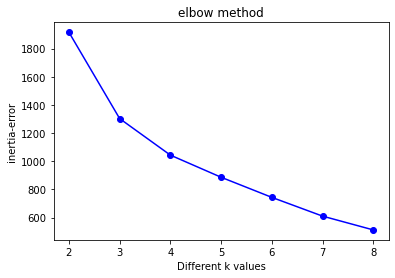

In [62]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

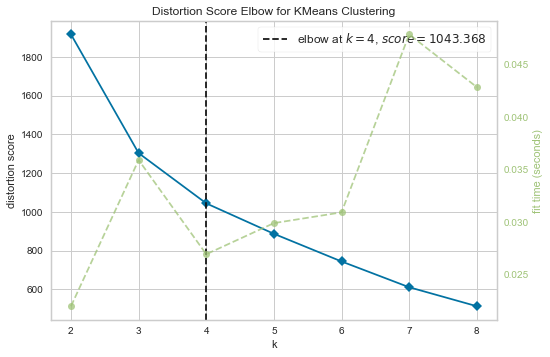

In [63]:
#yellowbrick

from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        
visualizer.show();

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8632043823295239
For n_clusters=3, the silhouette score is 0.8175067351947624
For n_clusters=4, the silhouette score is 0.49426429384945836
For n_clusters=5, the silhouette score is 0.5165473195841562
For n_clusters=6, the silhouette score is 0.5160418756514614
For n_clusters=7, the silhouette score is 0.47705444181113094
For n_clusters=8, the silhouette score is 0.46737057560053774


### Model Building and label visualisation

In [66]:
model = KMeans(n_clusters=3,random_state=42)

In [67]:
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [68]:
df["predicted_clusters"] = model.labels_

In [69]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,predicted_clusters
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0


In [70]:
ct = pd.crosstab(df.predicted_clusters, df.Country)
ct

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Croatia,Cuba,Czechia,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Madagascar,Malaysia,Mali,Mauritania,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Romania,Russia,Saudi Arabia,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
predicted_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
df["predicted_clusters"].value_counts()

0    134
2      3
1      1
Name: predicted_clusters, dtype: int64

### Evaluate 

In [72]:
df[df["predicted_clusters"] == 0].Country.to_list()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Croatia',
 'Cuba',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Liberia',
 'Libya',
 'Lithuania',
 'Madagascar',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozamb

In [73]:
df[df["predicted_clusters"] == 1].Country.to_list()

['United States']

In [74]:
silhouette_score(X,model.labels_)

0.8175067351947624

## Hierarchical Clustering

In [85]:
df1 = df.copy()

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [87]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

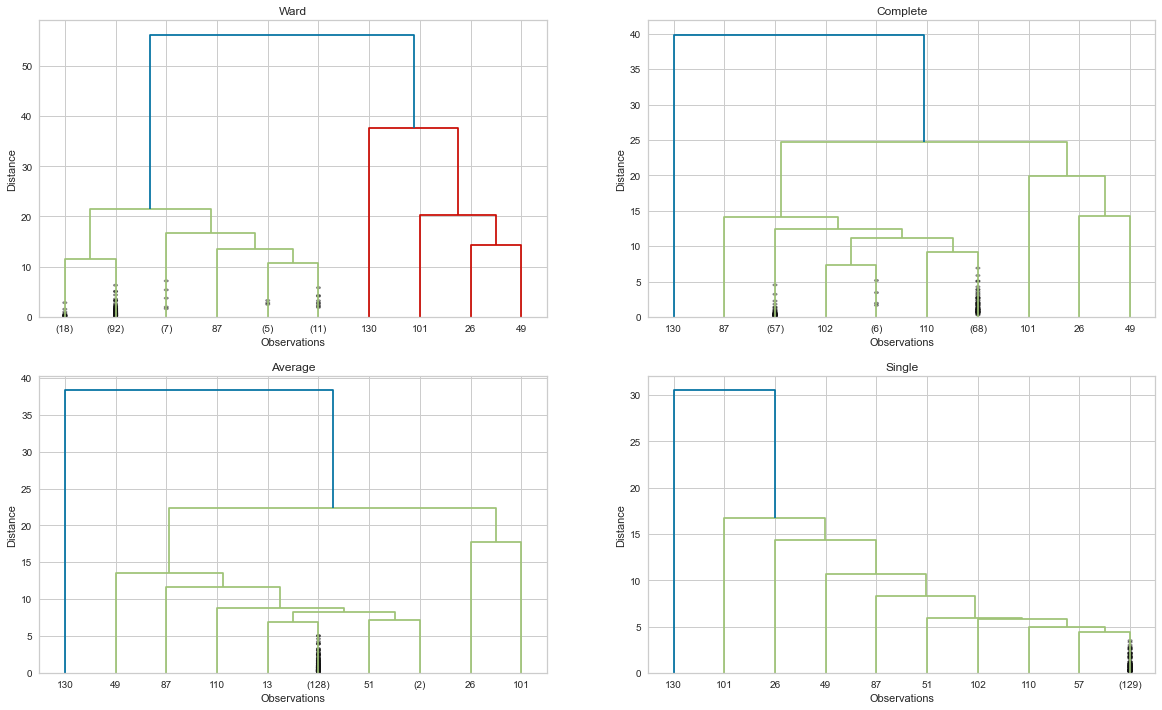

In [88]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.8453426187138385
Silhouette Score for 3 clusters: 0.8175067351947624
Silhouette Score for 4 clusters: 0.5031114495309918
Silhouette Score for 5 clusters: 0.5033828290538988
Silhouette Score for 6 clusters: 0.5118405176284716
Silhouette Score for 7 clusters: 0.5113907343211939
Silhouette Score for 8 clusters: 0.49425428110708525
Silhouette Score for 9 clusters: 0.265324694120148


### Model Building and label visualisation

In [91]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)

In [92]:
df1["predicted_clusters"] = clusters

In [93]:
df1.predicted_clusters.value_counts()

0    134
1      3
2      1
Name: predicted_clusters, dtype: int64

### Evaluate 

In [99]:
silhouette_score(X,df1.predicted_clusters)

0.8175067351947624